In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport

In [7]:
data=pd.read_csv(r"C:\Users\aflah\Downloads\analytics vidya\train_qnU1GcL.csv")
y_train=pd.read_csv(r"C:\Users\aflah\Downloads\analytics vidya\y_train.csv") #made a separate csv for y_train with target values
id=pd.read_csv(r"C:\Users\aflah\Downloads\analytics vidya\train_id.csv") #made a separate csv for id
data2=pd.read_csv(r"C:\Users\aflah\Downloads\analytics vidya\test_LxCaReE_DvdCKVT1_OJBGAnU.csv")#test data

In [55]:
profile = ProfileReport(data,title='Pandas profiling report')

In [56]:
profile.to_widgets() #generating profile report for the data

In [53]:
x_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.429,12058,12.780042,0.0,0.0,0.0,99.02,13,0,0,1,0,0,0,1
1,0.010,21546,12.660804,0.0,0.0,0.0,99.89,21,1,0,0,0,0,0,1
2,0.917,17531,11.340237,2.0,3.0,1.0,98.69,7,0,0,1,0,0,1,0
3,0.049,15341,12.431254,0.0,0.0,0.0,99.57,9,1,0,0,0,0,0,1
4,0.052,31400,12.199451,0.0,0.0,0.0,99.87,12,0,1,0,0,0,0,1


In [9]:
data=data[data['age_in_days']<34000] #removing age outlier above 34000 days

In [10]:
id=data['id']

In [11]:
id.head()

0    110936
1     41492
2     31300
3     19415
4     99379
Name: id, dtype: int64

In [12]:
id.to_csv (r"C:\Users\aflah\Downloads\analytics vidya\train_id.csv", index = False, header=True) #craeting separate csv for id

In [13]:
target=data['target']
target.shape

(79809,)

In [14]:
target.to_csv (r"C:\Users\aflah\Downloads\analytics vidya\y_train.csv", index = False, header=True)

In [15]:
data.corr() #finding correlation

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004914,0.004900,-0.001790,-0.005643,-0.002148,0.003402,-0.002217,-0.003258,-0.005097
perc_premium_paid_by_cash_credit,-0.004914,1.000000,-0.258840,-0.031931,0.214494,0.214978,0.168150,-0.142658,-0.153049,-0.241098
age_in_days,0.004900,-0.258840,1.000000,0.029673,-0.058201,-0.072713,-0.059368,0.049459,0.177846,0.095286
Income,-0.001790,-0.031931,0.029673,1.000000,-0.001417,-0.017358,-0.012405,0.085800,0.079025,0.016554
Count_3-6_months_late,-0.005643,0.214494,-0.058201,-0.001417,1.000000,0.204246,0.296126,-0.082696,0.075752,-0.248835
Count_6-12_months_late,-0.002148,0.214978,-0.072713,-0.017358,0.204246,1.000000,0.266327,0.004814,-0.093181,-0.286230
Count_more_than_12_months_late,0.003402,0.168150,-0.059368,-0.012405,0.296126,0.266327,1.000000,-0.031700,-0.021952,-0.240454
application_underwriting_score,-0.002217,-0.142658,0.049459,0.085800,-0.082696,0.004814,-0.031700,1.000000,-0.270739,0.068685
no_of_premiums_paid,-0.003258,-0.153049,0.177846,0.079025,0.075752,-0.093181,-0.021952,-0.270739,1.000000,0.022772
target,-0.005097,-0.241098,0.095286,0.016554,-0.248835,-0.286230,-0.240454,0.068685,0.022772,1.000000


In [16]:
del data['id']

In [17]:
del data['target']

In [18]:
x_train=data

In [19]:
test_id=data2['id']

In [20]:
test_id.head()

0      649
1    81136
2    70762
3    53935
4    15476
Name: id, dtype: int64

In [21]:
x_test=data2.drop('id',axis=1)

In [22]:
x_train.shape

(79809, 10)

In [23]:
x_test.shape

(34224, 10)

In [26]:
a=np.power(x_train['application_underwriting_score'],1/2) #variable transformation for application underwriting score

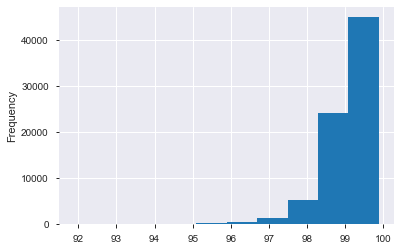

In [27]:
x_train['application_underwriting_score'].plot.hist()

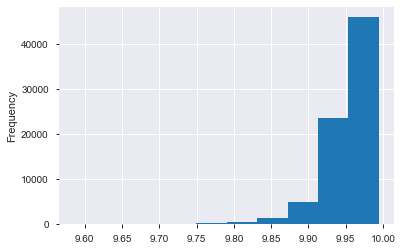

In [28]:
a.plot.hist()

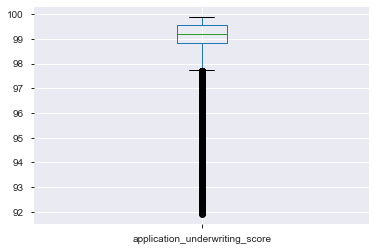

In [29]:
x_train['application_underwriting_score'].plot.box()

In [30]:

x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [54]:
x_train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

In [32]:
#filling the missing values for train
x_train['Count_3-6_months_late'].fillna(0 , inplace=True)
x_train['Count_6-12_months_late'].fillna(0 , inplace=True)
x_train['Count_more_than_12_months_late'].fillna(0 , inplace=True)
x_train['application_underwriting_score'].fillna(data2['application_underwriting_score'].median() , inplace=True)

In [33]:
#filling the missing values for test
x_test['Count_3-6_months_late'].fillna(0 , inplace=True)
x_test['Count_6-12_months_late'].fillna(0 , inplace=True)
x_test['Count_more_than_12_months_late'].fillna(0 , inplace=True)
x_test['application_underwriting_score'].fillna(data2['application_underwriting_score'].median() , inplace=True)

In [34]:
x_test.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

In [35]:
#logarithm variable transformation for income 
x_train['Income']=np.log(x_train['Income'])
x_train['Income'].skew()

0.04462491310151636

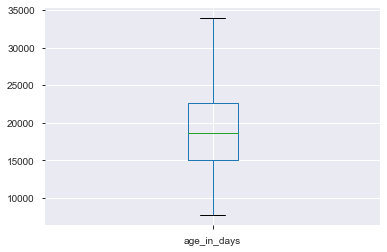

In [37]:
x_train['age_in_days'].plot.box()

In [42]:
lreg=LinearRegression()
logreg=LogisticRegression(solver='liblinear')
dtree=DecisionTreeClassifier( criterion='entropy',max_depth=10 ,min_samples_split=10) #changing parameters

In [43]:
x_train.shape

(79809, 15)

In [44]:
dtree.fit(x_train,y_train) #fitting for decision tree classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
x_test

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,0.001,27384,51150,0.0,0.0,0.0,99.89,7,1,0,0,0,0,1,0
1,0.124,23735,285140,0.0,0.0,0.0,98.93,19,1,0,0,0,0,0,1
2,1.000,17170,186030,0.0,0.0,0.0,99.21,2,0,1,0,0,0,0,1
3,0.198,16068,123540,0.0,0.0,0.0,99.00,11,0,1,0,0,0,1,0
4,0.041,10591,200020,1.0,0.0,0.0,99.17,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34219,0.227,20810,110240,0.0,0.0,0.0,97.52,9,1,0,0,0,0,0,1
34220,0.157,19353,125090,0.0,0.0,0.0,99.62,7,1,0,0,0,0,1,0
34221,0.325,18264,196570,0.0,0.0,0.0,98.58,14,0,1,0,0,0,1,0
34222,0.983,16798,212150,1.0,0.0,1.0,98.88,10,1,0,0,0,0,0,1


In [46]:
#predictions for test case
pred=dtree.predict(x_test) 

In [47]:
#score for the training data
dtree.score(x_train,y_train)

0.9454071595935295

In [48]:
pred=pd.DataFrame(pred)

In [49]:
#making the submission format of id and predicted target
pred['id']=data2['id']
pred.columns=['target','id']
pred = pred[['id','target']]

In [50]:
pred.head(10)

,id,target
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1
5,64797,1
6,67412,1
7,44241,1
8,5069,1
9,16615,1


In [51]:
#saving of the submission csv
pred.to_csv (r"C:\Users\aflah\Downloads\analytics vidya\pred15.csv", index = False, header=True)